# 1970년대 보스턴 지역의 주택 가격을 예측하는 회귀 문제

## 보스턴 주택 가격 데이터 준비하기

In [2]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋 80 : 테스트셋 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

57026/57026 [==============================] - 0s 0us/step


## 데이터 형태 확인하기

In [3]:
print('X_train.shape', X_train.shape) # 정답까지 포함하면 14개의 feature
print('y_train.shape', y_train.shape)

X_train.shape (404, 13)
y_train.shape (404,)


In [4]:
print('X_test.shape', X_test.shape) # 정답까지 포함하면 14개의 feature
print('y_test.shape', y_test.shape)

X_test.shape (102, 13)
y_test.shape (102,)


In [6]:
type(X_train) # type() : 어떤 데이터 형태인지 확인

numpy.ndarray

In [10]:
# 어떻게 데이터 전처리할지 파악하기 위해 데이터를 직접 확인
X_train[0] # 각 feature의 값이 13개 들어 있음

# feature마다 범위가 들쑥날쑥하므로 표준화를 활용해서 데이터 전처리하는 게 바람직함
# 표준화 : 데이터에서 평균을 빼고, 표준편차로 나눠줌

array([2.5199e-01, 0.0000e+00, 1.0590e+01, 0.0000e+00, 4.8900e-01,
       5.7830e+00, 7.2700e+01, 4.3549e+00, 4.0000e+00, 2.7700e+02,
       1.8600e+01, 3.8943e+02, 1.8060e+01])

In [11]:
y_train[0] # 집값이 담겨 있음 (천 달러 단위)

22.5

## 데이터 전처리 (feature만) - 표준화 (Standardzation)

In [ ]:
import numpy as np

# 표준화 : (데이터 - 전체 평균) / 표준편차
mean = np.mean(X_train, axis = 0) # 모든 데이터의 평균을 구해야 하기 때문에, axis는 0
std = np.std(X_train, axis = 0)

In [13]:
# X_train을 전처리했기 때문에, X_test도 전처리해 줘야 함
# 전처리에서는 X_train과 X_test 둘 다 처리
# 만약 처음부터 데이터가 합쳐진 상태에서 받아왔다면, 전처리 이후에 X_train과 X_test로 분리하는 게 더 편리함

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

print(X_train[0])

[-0.40102395 -0.48033655 -0.12089418 -0.28828791 -0.58254176 -0.68137272
  0.11117586  0.26484408 -0.65187119 -0.80249043  0.0756568   0.37366783
  0.69211835]


## 검증 데이터셋 분리하기

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train,
                                                  test_size = 0.33, random_state = 777)

print(X_train.shape, X_val.shape)

(270, 13) (134, 13)


## 모델 구성하기

In [18]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) # 집값을 예측하므로 출력값 1개 / activation 지정하지 않으면 기본값 'linear'

## 모델 설정하기

In [19]:
model.compile(optimizer = 'adam',
              loss = 'mse', # 오차율이 가장 중요한 데이터이므로 'mse' (실제 집값과 예측 집값의 차이)
              metrics = ['mae', 'mse']) # 회귀 모델에서 사용하는 성능 평가 지표

# mse, mae : 둘 다 오차를 양수로 만드는 방법  (실제 정답보다 적어서 오차이든 많아서 오차이든 동일한 오차율로 내기 위함)
# mae : 절댓값으로 오차율 계산 - 음수인 값만 양수로 변경하여 비교
# mse : 제곱값으로 오차율 계산 - 음수인 값과 양수인 값 모두 제곱을 계산하여 비교

## 모델 학습하기

In [ ]:
history = model.fit(X_train, y_train,
                    epochs = 300,
                    validation_data = (X_val, y_val))

## 모델 학습 결과 분석

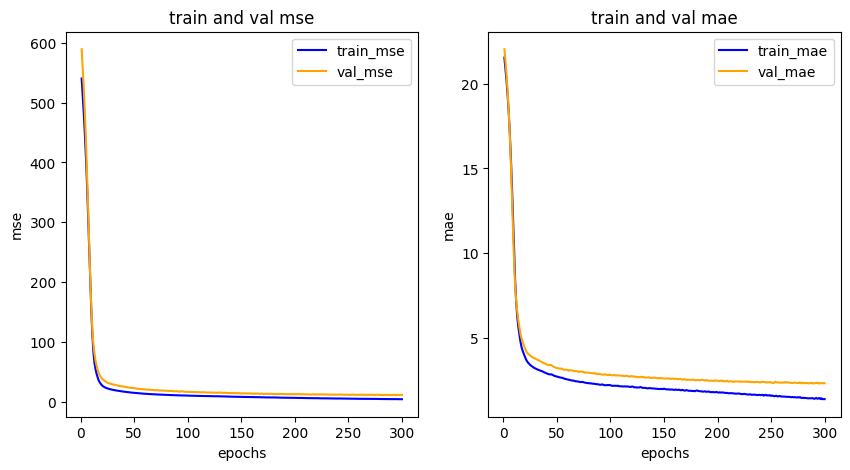

In [22]:
import matplotlib.pyplot as plt

his_dict = history.history
mse = his_dict['mse']
val_mse = his_dict['val_mse'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(mse) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, mse, color = 'blue', label = 'train_mse')
ax1.plot(epochs, val_mse, color = 'orange', label = 'val_mse')
ax1.set_title('train and val mse')
ax1.set_xlabel('epochs')
ax1.set_ylabel('mse')
ax1.legend()

mae = his_dict['mae']
val_mae = his_dict['val_mae']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, color = 'blue', label = 'train_mae')
ax2.plot(epochs, val_mae, color = 'orange', label = 'val_mae')
ax2.set_title('train and val mae')
ax2.set_xlabel('epochs')
ax2.set_ylabel('mae')
ax2.legend()

plt.show()

# 회귀 모델에서는 상승하는 그래프는 나오지 않음
# 회귀 모델에서 훈련셋은 오차율 0을 만들 때까지 학습하고, 검증셋은 일정 오차율 이후로 떨어지지 않음
# → 그 시점 이후로는 훈련셋과 검증셋의 오차율이 벌어지기만 하게 됨 (과대적합)

## 모델 평가하기

In [23]:
model.evaluate(X_test, y_test) # 한 번도 학습하지 않았던 테스트셋으로 평가
# 모델 오차율 2.14 → 실제 집값과 +-2,140 달러 정도 차이로 집값을 예측

4/4 [==============================] - 0s 4ms/step - loss: 9.1186 - mae: 2.1440 - mse: 9.1186


[9.11860466003418, 2.1440281867980957, 9.11860466003418]

## 모델 예측하고 결과 확인

4/4 [==============================] - 0s 3ms/step


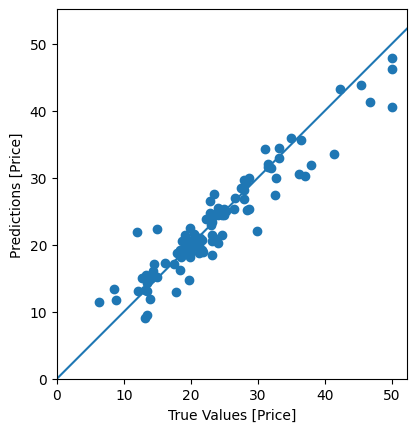

In [24]:
test_predictions = model.predict(X_test).flatten()

plt.scatter(y_test, test_predictions) # (실제 정답, 모델 예측값)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

# 결과 해석
# (기준선 아래에 더 많은 점이 찍혀 있으므로) 모델은 주로 실제 집값보다 더 낮게 집값을 예측하고 있음을 확인 가능함
# 실제 집값이 싸거나(10~20) 비쌀수록(40~50) 오차율이 심해지고 있음을 확인 가능 → 집값이 쌀 때와 비쌀 때의 데이터를 더 수집하여 학습시켜야겠다는 생각

## K-Fold 사용하여 모델 학습하기

*   학습 데이터셋 부족으로 성능이 낮은 경우 적용 가능
*   검증 데이터셋을 K-Fold로 사용하여, 학습 데이터셋 확보



### K-Fold를 위한 데이터 준비하기

In [25]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋 80 : 테스트셋 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

### 데이터 전처리

In [26]:
import numpy as np

# 표준화 : (데이터 - 전체 평균) / 표준편차
mean = np.mean(X_train, axis = 0) # 모든 데이터의 평균을 구해야 하기 때문에, axis는 0
std = np.std(X_train, axis = 0)

# X_train을 전처리했기 때문에, X_test도 전처리해 줘야 함
# 전처리에서는 X_train과 X_test 둘 다 처리
# 만약 처음부터 데이터가 합쳐진 상태에서 받아왔다면, 전처리 이후에 X_train과 X_test로 분리하는 게 더 편리함

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

### K-Fold를 사용한 모델 학습

In [28]:
from sklearn.model_selection import KFold

# 몇 번에 나눠서 학습할 것인지 k를 지정해 줘야 함
# 3-Fold로 나눠서 검증 데이터셋 사용하여 학습
k = 3

kfold = KFold(n_splits = k) # n_splits : 몇 개로 나눠서 학습할지

# 재사용을 위해 모델 구성 및 설정 함수로 선언

def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델(3개의 KFold)의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :
  # 각각의 fold를 만드는 과정 : 학습 데이터와 검증 데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기 → 총 3번(900) 학습될 것
  model.fit(X_train_fold, y_train_fold,
            epochs = 300, validation_data = (X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test) # _, : 첫 번째 평가 결과인 loss는 사용 안 한다는 의미
  mae_list.append(test_mae)

Epoch 1/300
9/9 [==============================] - 1s 25ms/step - loss: 585.3326 - mae: 22.3988 - val_loss: 553.8597 - val_mae: 21.7828
Epoch 2/300
9/9 [==============================] - 0s 7ms/step - loss: 554.8535 - mae: 21.7579 - val_loss: 527.6288 - val_mae: 21.1892
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 526.7626 - mae: 21.1308 - val_loss: 500.5550 - val_mae: 20.5652
Epoch 4/300
9/9 [==============================] - 0s 6ms/step - loss: 496.1549 - mae: 20.4383 - val_loss: 470.1035 - val_mae: 19.8472
Epoch 5/300
9/9 [==============================] - 0s 8ms/step - loss: 460.7883 - mae: 19.6204 - val_loss: 433.4684 - val_mae: 18.9600
Epoch 6/300
9/9 [==============================] - 0s 8ms/step - loss: 417.5748 - mae: 18.5761 - val_loss: 389.8819 - val_mae: 17.8714
Epoch 7/300
9/9 [==============================] - 0s 8ms/step - loss: 366.9645 - mae: 17.3361 - val_loss: 340.0340 - val_mae: 16.5494
Epoch 8/300
9/9 [==============================] - 0s

In [29]:
mae_list

[2.0781009197235107, 2.1526222229003906, 2.148803472518921]

### K-Fold 사용한 모델 성능 평가

In [30]:
np.mean(mae_list)
# 2.12 → 실제 집값과 2,120달러 차이

2.126508871714274

## 검증 데이터셋 사용하지 않고 학습한 모델 성능 평가

In [31]:
from keras.datasets.boston_housing import load_data

# 데이터 다운로드 (훈련셋 80 : 테스트셋 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

# 표준화 : (데이터 - 전체 평균) / 표준편차
mean = np.mean(X_train, axis = 0) # 모든 데이터의 평균을 구해야 하기 때문에, axis는 0
std = np.std(X_train, axis = 0)

# X_train을 전처리했기 때문에, X_test도 전처리해 줘야 함
# 전처리에서는 X_train과 X_test 둘 다 처리
# 만약 처음부터 데이터가 합쳐진 상태에서 받아왔다면, 전처리 이후에 X_train과 X_test로 분리하는 게 더 편리함

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

model = Sequential()

model.add(Dense(64, activation = 'relu', input_shape = (13, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

# 훈련 데이터셋에서 검증 데이터셋을 분리하지 않고, 모두 학습에 사용
model.fit(X_train, y_train, epochs = 300)

model.evaluate(X_test, y_test)

Epoch 1/300
13/13 [==============================] - 1s 2ms/step - loss: 574.7262 - mae: 22.1167
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 533.4696 - mae: 21.1264
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 491.9438 - mae: 20.0579
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 443.0674 - mae: 18.7384
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 380.8099 - mae: 17.1154
Epoch 6/300
13/13 [==============================] - 0s 4ms/step - loss: 304.2379 - mae: 15.1027
Epoch 7/300
13/13 [==============================] - 0s 3ms/step - loss: 223.9538 - mae: 12.7432
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 146.6111 - mae: 10.0091
Epoch 9/300
13/13 [==============================] - 0s 3ms/step - loss: 92.1826 - mae: 7.5926
Epoch 10/300
13/13 [==============================] - 0s 3ms/step - loss: 65.5694 - mae: 6.2010
Epoch 11/300
13/13 [=============

[8.718583106994629, 2.105992555618286]

In [32]:
model.evaluate(X_test, y_test) # 2.1 → 실제 집값과 2,100달러 차이

4/4 [==============================] - 0s 4ms/step - loss: 8.7186 - mae: 2.1060


[8.718583106994629, 2.105992555618286]

## 4-Fold 사용한 모델의 성능 평가

In [33]:
from keras.datasets.boston_housing import load_data
import numpy as np

# 데이터 다운로드 (훈련셋 80 : 테스트셋 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

# 표준화 : (데이터 - 전체 평균) / 표준편차
mean = np.mean(X_train, axis = 0) # 모든 데이터의 평균을 구해야 하기 때문에, axis는 0
std = np.std(X_train, axis = 0)

# X_train을 전처리했기 때문에, X_test도 전처리해 줘야 함
# 전처리에서는 X_train과 X_test 둘 다 처리
# 만약 처음부터 데이터가 합쳐진 상태에서 받아왔다면, 전처리 이후에 X_train과 X_test로 분리하는 게 더 편리함

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

from sklearn.model_selection import KFold

# 몇 번에 나눠서 학습할 것인지 k를 지정해 줘야 함
# 4-Fold로 나눠서 검증 데이터셋 사용하여 학습
k = 4

kfold = KFold(n_splits = k) # n_splits : 몇 개로 나눠서 학습할지

# 재사용을 위해 모델 구성 및 설정 함수로 선언

def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델(4개의 KFold)의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :
  # 각각의 fold를 만드는 과정 : 학습 데이터와 검증 데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기 → 총 4번(1200) 학습될 것
  model.fit(X_train_fold, y_train_fold,
            epochs = 300, validation_data = (X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test) # _, : 첫 번째 평가 결과인 loss는 사용 안 한다는 의미
  mae_list.append(test_mae)

Epoch 1/300
10/10 [==============================] - 1s 26ms/step - loss: 573.6636 - mae: 22.0799 - val_loss: 535.3454 - val_mae: 21.3773
Epoch 2/300
10/10 [==============================] - 0s 8ms/step - loss: 546.2524 - mae: 21.3884 - val_loss: 510.8914 - val_mae: 20.7326
Epoch 3/300
10/10 [==============================] - 0s 7ms/step - loss: 517.0464 - mae: 20.6248 - val_loss: 481.0990 - val_mae: 19.9306
Epoch 4/300
10/10 [==============================] - 0s 9ms/step - loss: 479.1969 - mae: 19.6205 - val_loss: 443.0640 - val_mae: 18.8911
Epoch 5/300
10/10 [==============================] - 0s 7ms/step - loss: 431.3797 - mae: 18.3398 - val_loss: 395.5465 - val_mae: 17.5743
Epoch 6/300
10/10 [==============================] - 0s 8ms/step - loss: 373.0680 - mae: 16.7994 - val_loss: 337.6884 - val_mae: 16.0177
Epoch 7/300
10/10 [==============================] - 0s 7ms/step - loss: 304.7454 - mae: 14.9022 - val_loss: 270.1310 - val_mae: 14.2033
Epoch 8/300
10/10 [=====================

In [34]:
np.mean(mae_list) # 2.16 → 실제 집값과 2,160달러 차이

2.1690933108329773

## 5-Fold 사용한 모델의 성능 평가

In [35]:
from keras.datasets.boston_housing import load_data
import numpy as np

# 데이터 다운로드 (훈련셋 80 : 테스트셋 20)
(X_train, y_train), (X_test, y_test) = load_data(path = 'boston_housing.npz',
                                                 test_split = 0.2,
                                                 seed = 777)

# 표준화 : (데이터 - 전체 평균) / 표준편차
mean = np.mean(X_train, axis = 0) # 모든 데이터의 평균을 구해야 하기 때문에, axis는 0
std = np.std(X_train, axis = 0)

# X_train을 전처리했기 때문에, X_test도 전처리해 줘야 함
# 전처리에서는 X_train과 X_test 둘 다 처리
# 만약 처음부터 데이터가 합쳐진 상태에서 받아왔다면, 전처리 이후에 X_train과 X_test로 분리하는 게 더 편리함

X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

from sklearn.model_selection import KFold

# 몇 번에 나눠서 학습할 것인지 k를 지정해 줘야 함
# 5-Fold로 나눠서 검증 데이터셋 사용하여 학습
k = 5

kfold = KFold(n_splits = k) # n_splits : 몇 개로 나눠서 학습할지

# 재사용을 위해 모델 구성 및 설정 함수로 선언

def get_model() :
  model = Sequential()

  model.add(Dense(64, activation = 'relu', input_shape = (13, )))
  model.add(Dense(32, activation = 'relu'))
  model.add(Dense(1))

  model.compile(optimizer = 'adam', loss = 'mse', metrics = ['mae'])

  return model

# 각 모델(5개의 KFold)의 평가 정보 담는 리스트 선언
mae_list = []

# k번 학습 및 평가
for train_idx, val_idx in kfold.split(X_train) :
  # 각각의 fold를 만드는 과정 : 학습 데이터와 검증 데이터 분리
  X_train_fold, X_val_fold = X_train[train_idx], X_train[val_idx]
  y_train_fold, y_val_fold = y_train[train_idx], y_train[val_idx]

  # 모델 불러오기
  model = get_model()

  # 모델 학습하기 → 총 5번(1500) 학습될 것
  model.fit(X_train_fold, y_train_fold,
            epochs = 300, validation_data = (X_val_fold, y_val_fold))

  # 모델 평가하기
  _, test_mae = model.evaluate(X_test, y_test) # _, : 첫 번째 평가 결과인 loss는 사용 안 한다는 의미
  mae_list.append(test_mae)

Epoch 1/300
11/11 [==============================] - 1s 31ms/step - loss: 557.8240 - mae: 21.7721 - val_loss: 508.4019 - val_mae: 20.9598
Epoch 2/300
11/11 [==============================] - 0s 8ms/step - loss: 527.2465 - mae: 21.0775 - val_loss: 478.2325 - val_mae: 20.2474
Epoch 3/300
11/11 [==============================] - 0s 8ms/step - loss: 491.8167 - mae: 20.2669 - val_loss: 441.5884 - val_mae: 19.3512
Epoch 4/300
11/11 [==============================] - 0s 9ms/step - loss: 447.6986 - mae: 19.2201 - val_loss: 395.6785 - val_mae: 18.1604
Epoch 5/300
11/11 [==============================] - 0s 9ms/step - loss: 394.2391 - mae: 17.8320 - val_loss: 337.9319 - val_mae: 16.5697
Epoch 6/300
11/11 [==============================] - 0s 8ms/step - loss: 325.9955 - mae: 15.9942 - val_loss: 269.6306 - val_mae: 14.4645
Epoch 7/300
11/11 [==============================] - 0s 8ms/step - loss: 247.4502 - mae: 13.6406 - val_loss: 200.0167 - val_mae: 11.9047
Epoch 8/300
11/11 [=====================

In [36]:
np.mean(mae_list) # 2.06 → 실제 집값과 2,060달러 차이

2.0620089530944825